In [1]:
# Author- Prakhar Agarwal
# AIM - Synthetic seismogram

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [46]:
density_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/gra_353_u1444a.txt",sep="\t") # input file is a txt file with tab b/w the fields
density_df.head()

,Depth CSF-A (m),Bulk density (GRA),P-wave velocity xy (m/s),density(corrected),vel(corrected)
0,0.00,1.007,719076.0,1.007,
1,0.05,1.154,1508.0,1.154,1508
2,0.10,1.189,1439.0,1.189,1439
3,0.15,1.273,1513.0,1.273,1513
4,0.20,1.299,1510.0,1.299,1510


In [47]:
# .info() and .describe()  suggest presence of negative values in density
density_df.info()
density_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11008 entries, 0 to 11007
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Depth CSF-A (m)           2615 non-null   float64
 1   Bulk density (GRA)        11008 non-null  float64
 2   P-wave velocity xy (m/s)  2615 non-null   float64
 3   density(corrected)        11008 non-null  object 
 4   vel(corrected)            11008 non-null  object 
dtypes: float64(3), object(2)
memory usage: 430.1+ KB


,Depth CSF-A (m),Bulk density (GRA),P-wave velocity xy (m/s)
count,2615.00000000,11008.00000000,2615.00000000
mean,69.33968795,1.75259084,166161.91089866
std,41.00378181,0.26471869,290084.41803405
min,0.00000000,-0.33300000,833.00000000
25%,34.66400000,1.65900000,1553.00000000
50%,67.30600000,1.78100000,1667.00000000
75%,100.84700000,1.90700000,1790.50000000
max,146.65800000,2.28400000,719076.00000000


density(corrected) and vel(corrected) are OBJECT types.
We convert them to float64 type

In [48]:
df_active = density_df.copy()
df_active

,Depth CSF-A (m),Bulk density (GRA),P-wave velocity xy (m/s),density(corrected),vel(corrected)
0,0.00,1.007,719076.0,1.007,
1,0.05,1.154,1508.0,1.154,1508
2,0.10,1.189,1439.0,1.189,1439
3,0.15,1.273,1513.0,1.273,1513
4,0.20,1.299,1510.0,1.299,1510
...,...,...,...,...,...
11003,NaN,1.755,NaN,1.755,
11004,NaN,1.922,NaN,1.922,
11005,NaN,2.023,NaN,2.023,
11006,NaN,1.979,NaN,1.979,


In [49]:
df_active= df_active.dropna(how='any',axis=0) # Dropping all rows with Nan values
df_active

,Depth CSF-A (m),Bulk density (GRA),P-wave velocity xy (m/s),density(corrected),vel(corrected)
0,0.000,1.007,719076.0,1.007,
1,0.050,1.154,1508.0,1.154,1508
2,0.100,1.189,1439.0,1.189,1439
3,0.150,1.273,1513.0,1.273,1513
4,0.200,1.299,1510.0,1.299,1510
...,...,...,...,...,...
2610,146.458,1.631,673104.0,1.631,
2611,146.508,1.942,1557.0,1.942,1557
2612,146.558,1.953,678229.0,1.953,
2613,146.608,1.893,672105.0,1.893,


In [50]:
df_active.replace(to_replace= " ",value=np.nan,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [51]:
df_active['vel(corrected)'] = df_active['vel(corrected)'].astype('float64')
df_active['density(corrected)'] = df_active['density(corrected)'].astype('float64')
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2614
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Depth CSF-A (m)           2615 non-null   float64
 1   Bulk density (GRA)        2615 non-null   float64
 2   P-wave velocity xy (m/s)  2615 non-null   float64
 3   density(corrected)        2608 non-null   float64
 4   vel(corrected)            1961 non-null   float64
dtypes: float64(5)
memory usage: 122.6 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:

#We drop the columns 2 and 3
df_active.drop(['Bulk density (GRA)','P-wave velocity xy (m/s)'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
df_active.isnull().sum() # Checking for null values

Depth CSF-A (m)         0
density(corrected)      7
vel(corrected)        654
dtype: int64

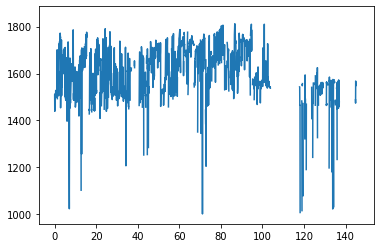

In [55]:
plt.plot(df_active['Depth CSF-A (m)'],df_active['vel(corrected)']) # The plots shows us the gaps where NAN values are present

In [56]:
df_active.head(3)

,Depth CSF-A (m),density(corrected),vel(corrected)
0,0.00,1.007,NaN
1,0.05,1.154,1508.0
2,0.10,1.189,1439.0


In [57]:
# Adding a column for depth interval b/w 2 readings
df_active['Depth_Interval(m)'] = np.nan
df_active['Depth_Interval(m)'][1:] = df_active['Depth CSF-A (m)'][1:].values - df_active['Depth CSF-A (m)'][0:-1].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is 

In [58]:
df_active.head(3)

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m)
0,0.00,1.007,NaN,NaN
1,0.05,1.154,1508.0,0.05
2,0.10,1.189,1439.0,0.05


In [59]:
df_active['vel(corrected)'].isna().sum()

654

vel(corrected) has NAN values i.e. the data has gaps. We need to apply interpolation to fill these gaps

linear:1
polynomial:4
quadratic:4
pchip:1
akima:4


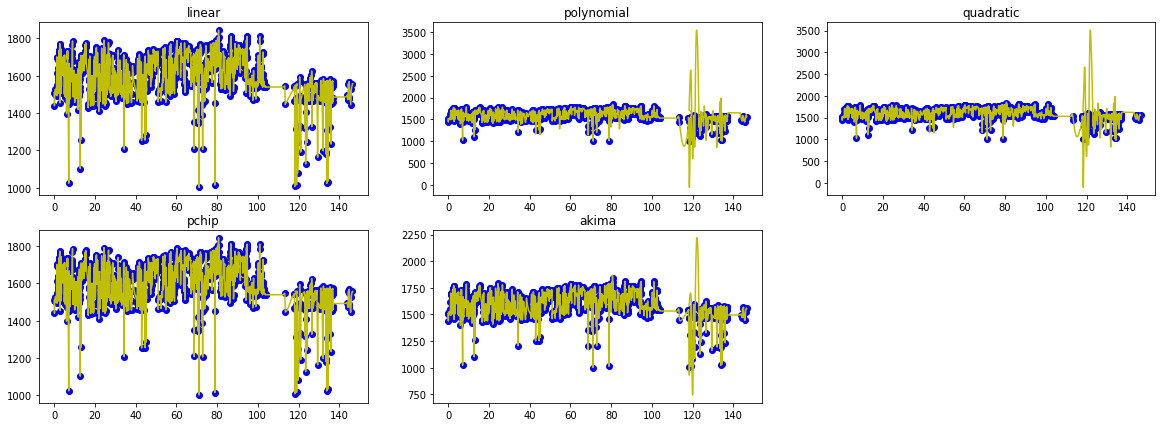

In [62]:
#VELOCITY INTERPOLATION
# Here we apply different interpolation methods to choose the best one
plt.figure(figsize=(20,7))
for i,meth in enumerate(['linear','polynomial','quadratic','pchip','akima']):
  s = pd.Series(df_active['vel(corrected)'])
  t = s.interpolate(method=meth,order=3)
  print('{}:{}'.format(meth,t.isna().sum())) # Just checking the number of NAN values left after interpolation. 
  plt.subplot(2,3,i+1,)
  plt.plot(df_active['Depth CSF-A (m)'],s,'bo') # original series plotted with blue circles
  plt.plot(df_active['Depth CSF-A (m)'],t,'y') # interpolated series plotted as a smooth yellow line
  plt.title(meth)


linear:0
polynomial:0
quadratic:0
pchip:0
akima:0


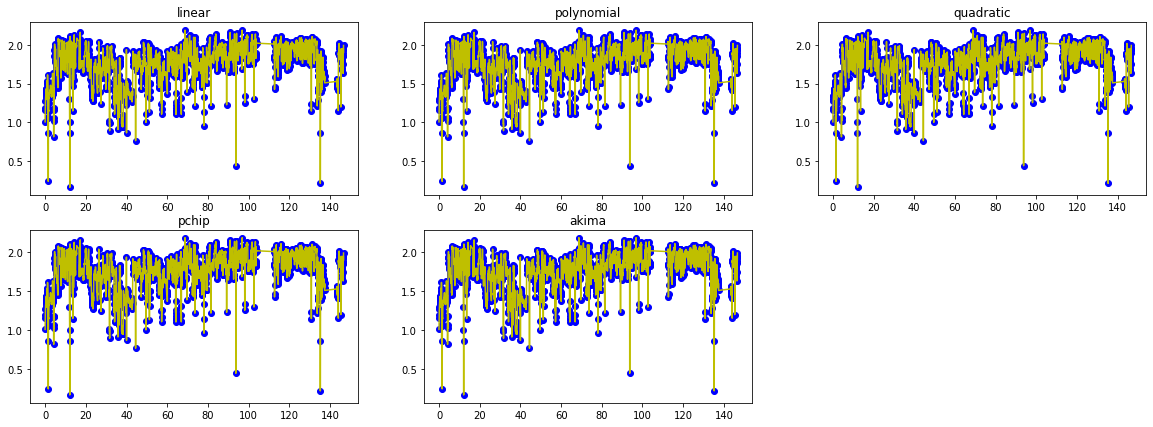

In [61]:
#DENSITY INTERPOLATION since there are 7 Nan values in its column
# Here we apply different interpolation methods to choose the best one
plt.figure(figsize=(20,7))
for i,meth in enumerate(['linear','polynomial','quadratic','pchip','akima']):
  s = pd.Series(df_active['density(corrected)'])
  t = s.interpolate(method=meth,order=3)
  print('{}:{}'.format(meth,t.isna().sum())) # Just checking the number of NAN values left after interpolation. 
  plt.subplot(2,3,i+1,)
  plt.plot(df_active['Depth CSF-A (m)'],s,'bo') # original series plotted with blue circles
  plt.plot(df_active['Depth CSF-A (m)'],t,'y') # interpolated series plotted as a smooth yellow line
  plt.title(meth)

* From the above analysis pchip interpolation seems good for interpolation, so we use it .

In [67]:
df_active['vel(corrected)'].interpolate(method='pchip',inplace=True)
print(df_active['vel(corrected)'].isna().sum())

1


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
df_active['density(corrected)'].interpolate(method='pchip',inplace=True)
print(df_active['density(corrected)'].isna().sum())

0


In [68]:
df_active.head()

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m)
0,0.00,1.007,NaN,NaN
1,0.05,1.154,1508.0,0.05
2,0.10,1.189,1439.0,0.05
3,0.15,1.273,1513.0,0.05
4,0.20,1.299,1510.0,0.05


In [69]:
pd.set_option("display.precision", 8)
# Column for 1 way time b/w 2 successive depth intervals
df_active['time_interval(sec)'] = (df_active['Depth_Interval(m)'])/df_active['vel(corrected)']
df_active['time_interval(sec)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0              NaN
1       0.00003316
2       0.00003475
3       0.00003305
4       0.00003311
           ...    
2610    0.00003212
2611    0.00003211
2612    0.00003212
2613    0.00003214
2614    0.00003217
Name: time_interval(sec), Length: 2615, dtype: float64

In [70]:
# Cumulative time i.e. time from surface to that depth
df_active['time(sec)'] = np.cumsum(df_active['time_interval(sec)'])
df_active['time(sec)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0              NaN
1       0.00003316
2       0.00006790
3       0.00010095
4       0.00013406
           ...    
2610    0.09355799
2611    0.09359010
2612    0.09362222
2613    0.09365436
2614    0.09368653
Name: time(sec), Length: 2615, dtype: float64

In [71]:
df_active.head(2)

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m),time_interval(sec),time(sec)
0,0.00,1.007,NaN,NaN,NaN,NaN
1,0.05,1.154,1508.0,0.05,0.00003316,0.00003316


In [72]:
# We change 1st value in vel(corrected) column to be equal to the second value i.e 1508.0 m/s
# starting time is ZERO at the surface
df_active['vel(corrected)'].iloc[0] = 1508.0 
df_active['time(sec)'].iloc[0] = 0.0 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [73]:
df_active.head(2)

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m),time_interval(sec),time(sec)
0,0.00,1.007,1508.0,NaN,NaN,0.00000000
1,0.05,1.154,1508.0,0.05,0.00003316,0.00003316


RC = (Z2-Z1)/(Z2+Z1) where Z is impedance. 
https://wiki.seg.org/wiki/Reflection_coefficient

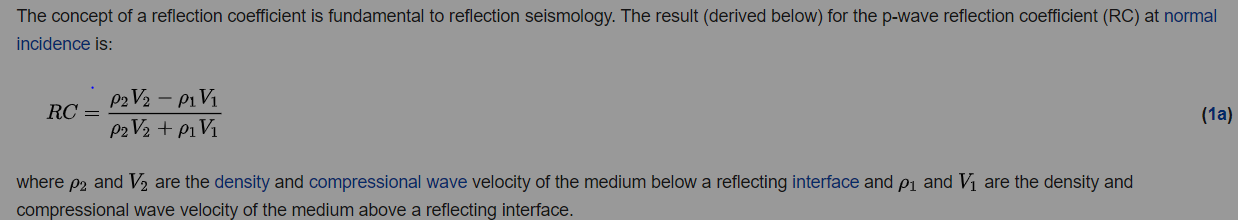

In [74]:
# Impedance calculation
df_active['Impedance'] = df_active['density(corrected)'].mul(df_active['vel(corrected)'])
df_active['Impedance']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       1518.55600000
1       1740.23200000
2       1710.97100000
3       1926.04900000
4       1961.49000000
            ...      
2610    2538.98475912
2611    3023.69400000
2612    3040.22490630
2613    2945.05373064
2614    3094.34668808
Name: Impedance, Length: 2615, dtype: float64

In [75]:
# RC
df_active['RC'] =np.nan
df_active['RC'].iloc[1:] = np.divide((df_active['Impedance'][1:].values -df_active['Impedance'][0:-1].values),(df_active['Impedance'][1:].values + df_active['Impedance'][0:-1].values))
df_active['RC']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0              NaN
1       0.06802406
2      -0.00847849
3       0.05913578
4       0.00911656
           ...    
2610   -0.03520347
2611    0.08713594
2612    0.00272611
2613   -0.01590088
2614    0.02471983
Name: RC, Length: 2615, dtype: float64

In [76]:
df_active.head(3)

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m),time_interval(sec),time(sec),Impedance,RC
0,0.00,1.007,1508.0,NaN,NaN,0.00000000,1518.556,NaN
1,0.05,1.154,1508.0,0.05,0.00003316,0.00003316,1740.232,0.06802406
2,0.10,1.189,1439.0,0.05,0.00003475,0.00006790,1710.971,-0.00847849


Text(0, 0.5, 'RC')

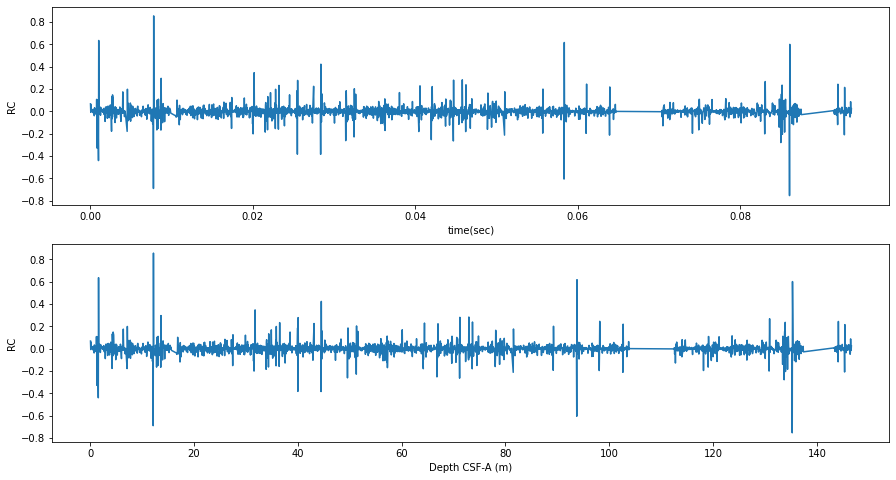

In [77]:
# Plotting RC against depth
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(df_active['time(sec)'],df_active['RC'])
plt.xlabel('time(sec)')
plt.ylabel('RC')
plt.subplot(2, 1, 2)
plt.plot(df_active['Depth CSF-A (m)'],df_active['RC'])
plt.xlabel('Depth CSF-A (m)')
plt.ylabel('RC')

In [78]:
# the seismogram should be in two way travel time, so we multiply the time column by 2 and make TWT(in sec) column
df_active['TWT(sec)'] = df_active['time(sec)']*2
df_active['TWT(sec)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       0.00000000
1       0.00006631
2       0.00013581
3       0.00020190
4       0.00026812
           ...    
2610    0.18711597
2611    0.18718020
2612    0.18724444
2613    0.18730871
2614    0.18737306
Name: TWT(sec), Length: 2615, dtype: float64

In [79]:
df_active.head(4)

,Depth CSF-A (m),density(corrected),vel(corrected),Depth_Interval(m),time_interval(sec),time(sec),Impedance,RC,TWT(sec)
0,0.00,1.007,1508.0,NaN,NaN,0.00000000,1518.556,NaN,0.00000000
1,0.05,1.154,1508.0,0.05,0.00003316,0.00003316,1740.232,0.06802406,0.00006631
2,0.10,1.189,1439.0,0.05,0.00003475,0.00006790,1710.971,-0.00847849,0.00013581
3,0.15,1.273,1513.0,0.05,0.00003305,0.00010095,1926.049,0.05913578,0.00020190


In [80]:
# We resample the TWT and impedance columns

dt = 0.0001   #sampling interval
t_max = 0.2   # max time to create time vector
t = np.arange(0, t_max, dt)
AI_tdom = np.interp(x=t, xp = df_active['TWT(sec)'], fp = df_active['Impedance'])    #resampling
# again Rc calulation but in reampled time domain
Rc_tdom = []
for i in range(len(AI_tdom)-1):
    Rc_tdom.append((AI_tdom[i+1]-AI_tdom[i])/(AI_tdom[i]+AI_tdom[i+1]))


In [81]:
# We choose a Ricker wavelet for convolution with the RC series
# define function of ricker wavelet
def ricker(f, length, dt):
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y

f=20            #wavelet frequency
length=0.001    #Wavelet vector length
dt=dt           # Sampling prefer to use smiliar to resampled AI
t0, w = ricker (f, length, dt) # ricker wavelet
len(w)

10

In [82]:
# Synthetic seismogram is aconvolution of wavelet and the resampled RC series
synthetic = np.convolve(w, Rc_tdom, mode='same')

Text(0.5, 1.0, 'Synthetic seismogram')

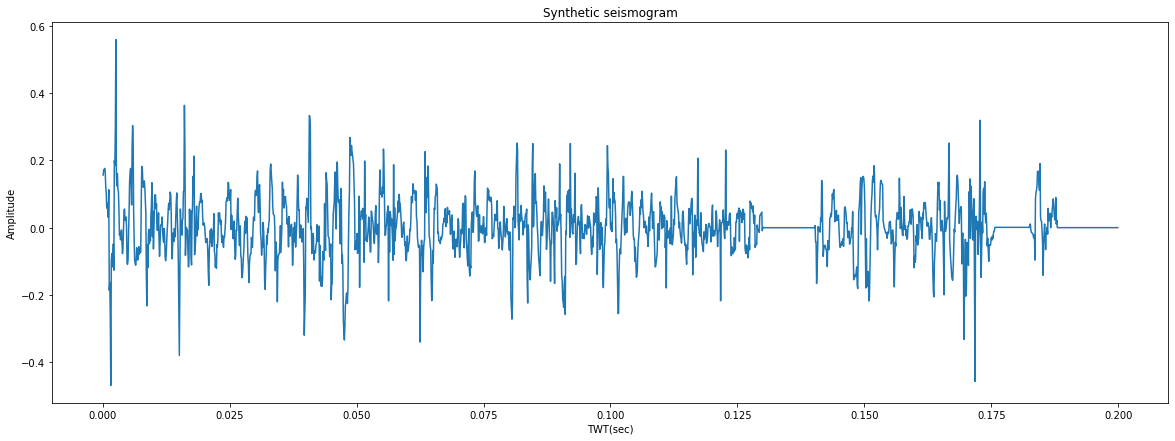

In [86]:
plt.figure(figsize=(20,7))
plt.plot(t[1:],synthetic)
plt.xlabel('TWT(sec)')
plt.ylabel('Amplitude')
plt.title('Synthetic seismogram')